# Project 2 – Titanic Dataset Analysis
**Name:** Lindsay Foster 
**Date:** 10/30/2025

## Introduction
The Titanic dataset contains information about passengers, including demographics, ticket information, and survival status. The goal of this project is to explore the dataset, analyze patterns, and apply basic machine learning techniques to predict survival.


In [3]:
# all imports get moved to the top - import each only once

import seaborn as sns
import pandas as pd

In [4]:
# Load Titanic dataset
titanic = sns.load_dataset('titanic')

In [5]:
# Display basic information about the dataset using the info() method.
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
# Display the first 10 rows
print(titanic.head(10))

   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes

In [7]:
# Check for missing values using the isnull() method and then the sum() method. 
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
# Display summary statistics using the describe() method
print(titanic.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [9]:
# Check for correlations using the corr() method and tell it to use only the numeric features. 
print(titanic.corr(numeric_only=True))

            survived    pclass       age     sibsp     parch      fare  \
survived    1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307   
pclass     -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500   
age        -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067   
sibsp      -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651   
parch       0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225   
fare        0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000   
adult_male -0.557080  0.094035  0.280328 -0.253586 -0.349943 -0.182024   
alone      -0.203367  0.135207  0.198270 -0.584471 -0.583398 -0.271832   

            adult_male     alone  
survived     -0.557080 -0.203367  
pclass        0.094035  0.135207  
age           0.280328  0.198270  
sibsp        -0.253586 -0.584471  
parch        -0.349943 -0.583398  
fare         -0.182024 -0.271832  
adult_male    1.000000  0.404744  
alone         0.404744  1.000000  


array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='fare', ylabel='age'>,
        <Axes: xlabel='pclass', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='fare'>,
        <Axes: xlabel='fare', ylabel='fare'>,
        <Axes: xlabel='pclass', ylabel='fare'>],
       [<Axes: xlabel='age', ylabel='pclass'>,
        <Axes: xlabel='fare', ylabel='pclass'>,
        <Axes: xlabel='pclass', ylabel='pclass'>]], dtype=object)

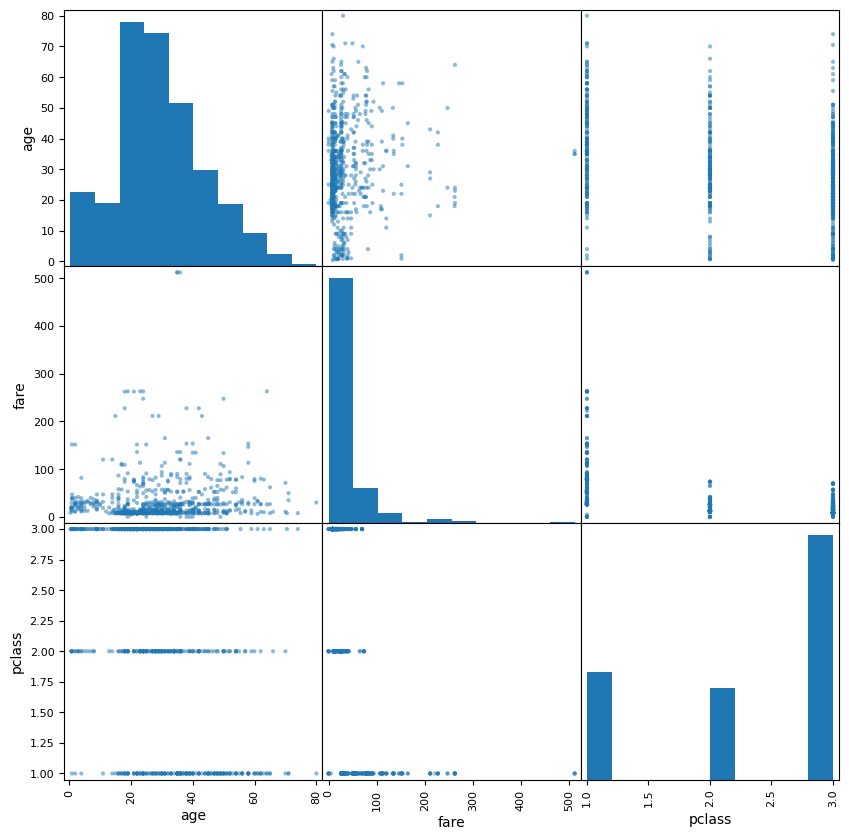

In [10]:
# all imports get moved to the top - import each only once
from pandas.plotting import scatter_matrix


attributes = ['age', 'fare', 'pclass']
scatter_matrix(titanic[attributes], figsize=(10, 10))

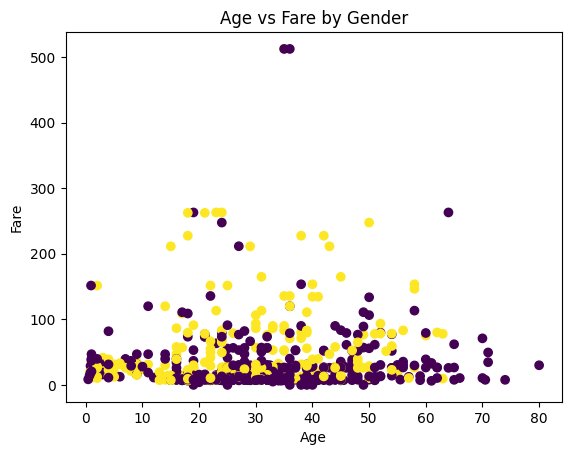

In [11]:
# all imports get moved to the top - import each only once
import matplotlib.pyplot as plt
 
# Create a scatter plot of age vs fare, colored by gender
plt.scatter(titanic['age'], titanic['fare'], c=titanic['sex'].apply(lambda x: 0 if x == 'male' else 1))
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare by Gender')
plt.show()

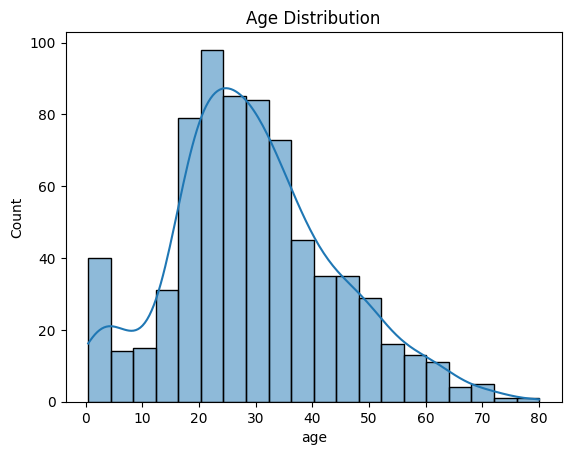

In [12]:
# histogram of age:

sns.histplot(titanic['age'], kde=True)
plt.title('Age Distribution')
plt.show()

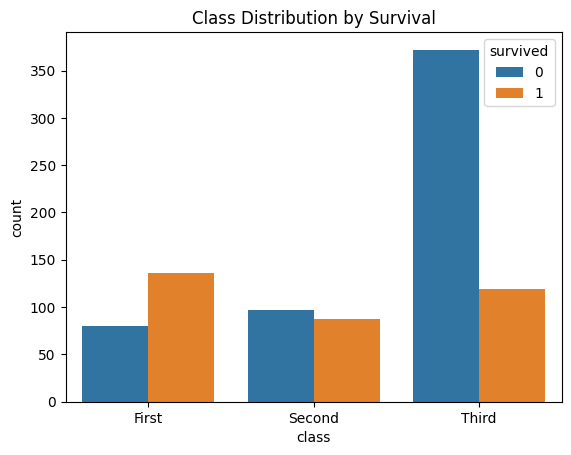

In [13]:
# count plot for class and survival

sns.countplot(x='class', hue='survived', data=titanic)
plt.title('Class Distribution by Survival')
plt.show()

In [14]:
# Impute missing values for Age using the median
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

# Impute missing values for embark_town using the mode
titanic['embark_town'] = titanic['embark_town'].fillna(titanic['embark_town'].mode()[0])
# Verify that there are no more missing values
print(titanic.isnull().sum())

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64


In [15]:
# Create a new feature 'family_size' by combining 'sibsp' and 'parch'

titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

In [16]:
# Convert categorical variables into numeric using mapping

titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [17]:
# Create a new feature 'alone' to indicate if a passenger is alone or with family

titanic['alone'] = titanic['alone'].astype(int)

print(titanic.head())

print(titanic[['family_size', 'sex', 'embarked', 'alone']].head())


   survived  pclass  sex   age  sibsp  parch     fare  embarked  class    who  \
0         0       3    0  22.0      1      0   7.2500       2.0  Third    man   
1         1       1    1  38.0      1      0  71.2833       0.0  First  woman   
2         1       3    1  26.0      0      0   7.9250       2.0  Third  woman   
3         1       1    1  35.0      1      0  53.1000       2.0  First  woman   
4         0       3    0  35.0      0      0   8.0500       2.0  Third    man   

   adult_male deck  embark_town alive  alone  family_size  
0        True  NaN  Southampton    no      0            2  
1       False    C    Cherbourg   yes      0            2  
2       False  NaN  Southampton   yes      1            1  
3       False    C  Southampton   yes      0            2  
4        True  NaN  Southampton    no      1            1  
   family_size  sex  embarked  alone
0            2    0       2.0      0
1            2    1       0.0      0
2            1    1       2.0      1
3    

In [18]:
print("Sex unique values:", titanic['sex'].unique())
print("Embarked unique values:", titanic['embarked'].unique())
print("Alone unique values:", titanic['alone'].unique())


Sex unique values: [0 1]
Embarked unique values: [ 2.  0.  1. nan]
Alone unique values: [0 1]


# Feature Selection and Justification

In [19]:
# Input features
X = titanic[['age', 'fare', 'pclass', 'sex', 'family_size']]

# Target variable
y = titanic['survived']


In [20]:
# Show first few rows of features
print(X.head())

# Show first few rows of target
print(y.head())

# Quick summary statistics
print(X.describe())


    age     fare  pclass  sex  family_size
0  22.0   7.2500       3    0            2
1  38.0  71.2833       1    1            2
2  26.0   7.9250       3    1            1
3  35.0  53.1000       1    1            2
4  35.0   8.0500       3    0            1
0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64
              age        fare      pclass         sex  family_size
count  891.000000  891.000000  891.000000  891.000000   891.000000
mean    29.361582   32.204208    2.308642    0.352413     1.904602
std     13.019697   49.693429    0.836071    0.477990     1.613459
min      0.420000    0.000000    1.000000    0.000000     1.000000
25%     22.000000    7.910400    2.000000    0.000000     1.000000
50%     28.000000   14.454200    3.000000    0.000000     1.000000
75%     35.000000   31.000000    3.000000    1.000000     2.000000
max     80.000000  512.329200    3.000000    1.000000    11.000000


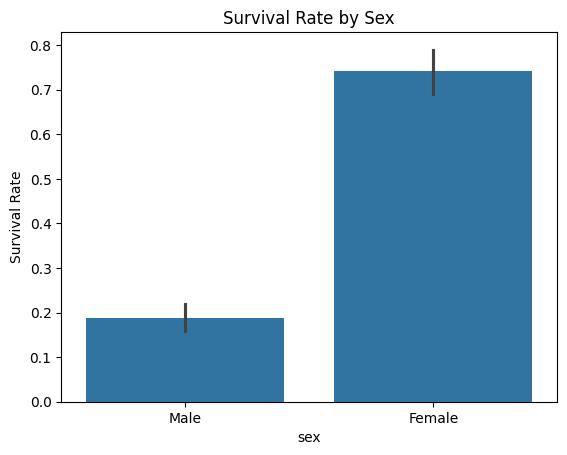

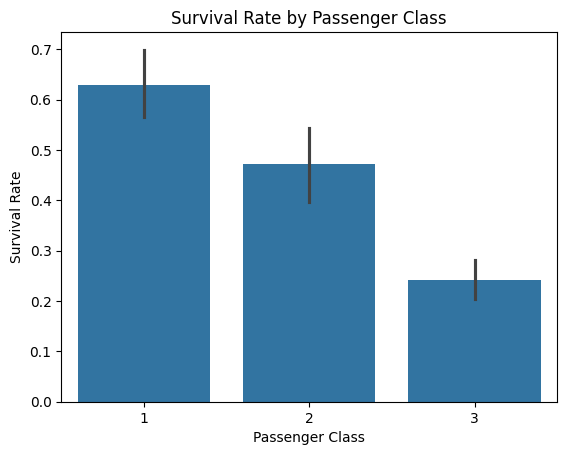

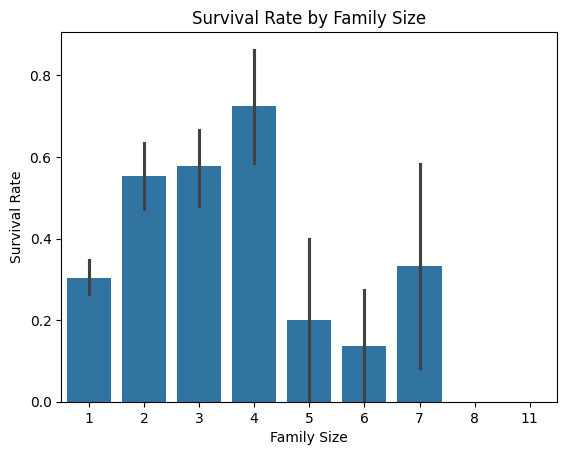

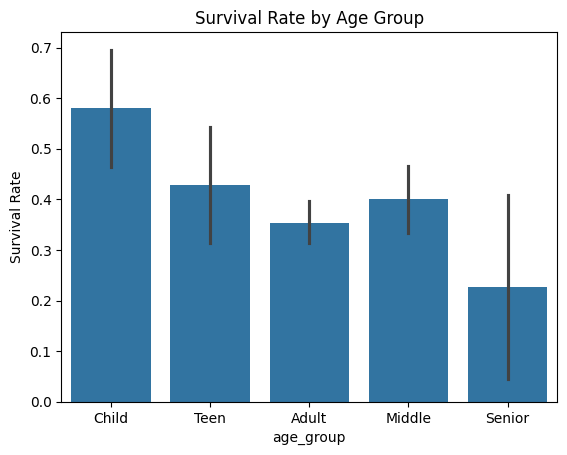

In [22]:
# Survival rate by Sex
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='sex', y='survived', data=titanic)
plt.xticks([0, 1], ['Male', 'Female'])
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Sex')
plt.show()

# Survival rate by Passenger Class (Pclass)
sns.barplot(x='pclass', y='survived', data=titanic)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class')
plt.show()

# Survival rate by Family Size
sns.barplot(x='family_size', y='survived', data=titanic)
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Family Size')
plt.show()

# Survival rate by Age Group
titanic['age_group'] = pd.cut(titanic['age'], bins=[0, 12, 18, 35, 60, 80], labels=['Child','Teen','Adult','Middle','Senior'])
sns.barplot(x='age_group', y='survived', data=titanic)
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Age Group')
plt.show()

# Train Test Split

In [24]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

# Print the sizes
print('X_train size:', len(X_train))
print('X_test size:', len(X_test))
print('y_train size:', len(y_train))
print('y_test size:', len(y_test))


X_train size: 712
X_test size: 179
y_train size: 712
y_test size: 179


In [25]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    train_set = X.iloc[train_indices]
    test_set = X.iloc[test_indices]

print('Train size:', len(train_set))
print('Test size:', len(test_set))

Train size: 712
Test size: 179


In [27]:
# Original target distribution
print("Original Class Distribution:\n", y.value_counts(normalize=True))

# Train set target distribution
print("Train Set Class Distribution:\n", y_train.value_counts(normalize=True))

# Test set target distribution
print("Test Set Class Distribution:\n", y_test.value_counts(normalize=True))


Original Class Distribution:
 survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64
Train Set Class Distribution:
 survived
0    0.610955
1    0.389045
Name: proportion, dtype: float64
Test Set Class Distribution:
 survived
0    0.636872
1    0.363128
Name: proportion, dtype: float64
